# 准备训练数据
1. 分词
2. 构造词典
3. 构造train/dev/text

In [14]:
import pandas as pd
from LAC import LAC
lac = LAC(mode='seg')

---    Fused 0 subgraphs into layer_norm op.


In [4]:
def _seg_text(text):
    seg_result = lac.run(text)
    return ' '.join(seg_result)

In [11]:
# 加载数据
src = pd.read_csv('test.src', names=['src'])
tgt = pd.read_csv('test.tgt', names=['tgt'])

In [31]:
src.shape

(725, 2)

In [10]:
# 分词

In [23]:
src['seg_src'] = src.src.apply(_seg_text)

In [24]:
tgt['seg_tgt'] = tgt.tgt.apply(_seg_text)

In [26]:
seg_src_tgt = pd.concat([src[['seg_src']], tgt[['seg_tgt']]], axis=1)

In [32]:
seg_src_tgt['src_tgt'] = seg_src_tgt['seg_src'] + '<SEP>' + seg_src_tgt['seg_tgt']

In [36]:
def _split(x):
    return x.split(' ')

In [38]:
seg_src_tgt['tgt_list'] = seg_src_tgt.seg_tgt.apply(_split)

In [39]:
seg_src_tgt['src_list'] = seg_src_tgt.seg_src.apply(_split)

In [91]:
sample_seg_src_tgt = seg_src_tgt.sample(frac=0.5, random_state=42)

In [92]:
sample_seg_src_tgt.shape

(362, 5)

In [ ]:
# 生成vocab

In [93]:
vocab = []

In [94]:
for index, row in sample_seg_src_tgt.iterrows():
    vocab += row['tgt_list']
    vocab += row['src_list']

In [99]:
len(set(vocab))

7612

In [100]:
vocab = list(set(vocab))
with open('vocab.txt', 'w+') as w:
    for t in vocab:
        w.write(t + '\n')

In [96]:
import numpy as np
train, dev = np.split(sample_seg_src_tgt[['src_tgt']], [int(0.8 * len(sample_seg_src_tgt)),]) 

In [97]:
train.to_csv('train_sample.txt', index=False, header=False)

In [98]:
dev.to_csv('dev_sample.txt', index=False, header=False)

In [35]:
# 统计长度

In [53]:
src_len = seg_src_tgt['src_list'].apply(len)
tgt_len = seg_src_tgt['tgt_list'].apply(len)

/home/humeng/anaconda3/envs/pytorch-multi/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


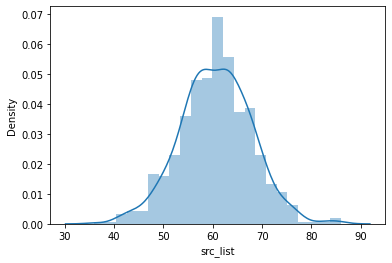

In [52]:
sns.distplot(src_len);

/home/humeng/anaconda3/envs/pytorch-multi/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


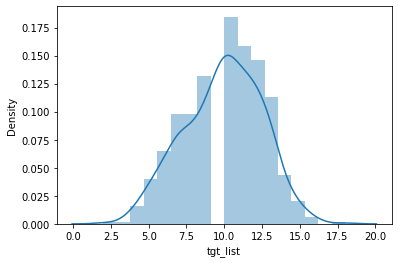

In [51]:
sns.distplot(tgt_len);

In [89]:
float('2.1')

2.1